In [2]:
import numpy as np 
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
np.load = np_load_old

In [5]:
train_data.shape

(25000,)

In [6]:
len(train_data[0])

218

In [7]:
len(train_data[1])

189

In [8]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [10]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #input_shape: feature의수
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0718 14:43:16.349387  7952 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 14:43:16.365387  7952 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 14:43:16.367392  7952 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', # mse, cee, 
              metrics=['accuracy'])

W0718 14:43:16.780868  7952 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 14:43:16.799868  7952 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0718 14:43:16.803867  7952 deprecation.py:323] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0718 14:43:18.166733  7952 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.5545 - acc: 0.7653 - val_loss: 0.3965 - val_acc: 0.8585
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2935 - acc: 0.9013 - val_loss: 0.2917 - val_acc: 0.8891
Epoch 3/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1948 - acc: 0.9350 - val_loss: 0.2772 - val_acc: 0.8889
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1434 - acc: 0.9533 - val_loss: 0.2876 - val_acc: 0.8867
Epoch 5/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1080 - acc: 0.9689 - val_loss: 0.3049 - val_acc: 0.8844
Epoch 6/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0808 - acc: 0.9800 - val_loss: 0.3301 - val_acc: 0.8814
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.0597 - acc: 0.9884 - val_loss: 0.3582 - 

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

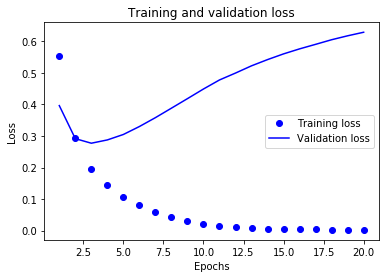

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

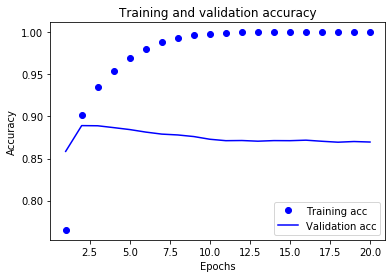

In [20]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #input_shape: feature의수
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy', # mse, cee, 
              metrics=['accuracy'])


In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.5316 - acc: 0.7803 - val_loss: 0.3967 - val_acc: 0.8624
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.3150 - acc: 0.9007 - val_loss: 0.3179 - val_acc: 0.8835
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.2410 - acc: 0.9249 - val_loss: 0.2904 - val_acc: 0.8888
Epoch 4/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.1967 - acc: 0.9410 - val_loss: 0.2799 - val_acc: 0.8900
Epoch 5/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1669 - acc: 0.9525 - val_loss: 0.2769 - val_acc: 0.8883
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1441 - acc: 0.9596 - val_loss: 0.2781 - val_acc: 0.8881
Epoch 7/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1255 - acc: 0.9669 - val_loss: 0.2819 - 

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

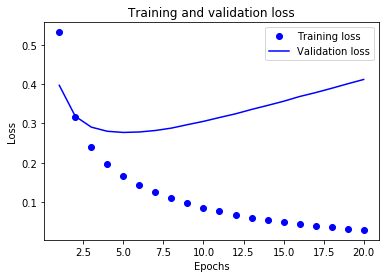

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

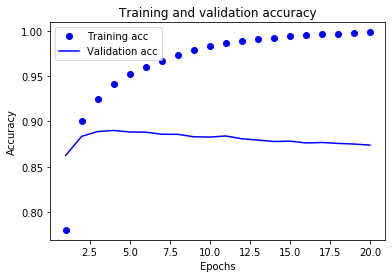

In [26]:

plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #input_shape: feature의수
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy', # mse, cee, 
              metrics=['accuracy'])

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5834 - acc: 0.7714 - val_loss: 0.4238 - val_acc: 0.8588
Epoch 2/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.3058 - acc: 0.9009 - val_loss: 0.2879 - val_acc: 0.8884
Epoch 3/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.1866 - acc: 0.9363 - val_loss: 0.2796 - val_acc: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1297 - acc: 0.9589 - val_loss: 0.2968 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.0915 - acc: 0.9745 - val_loss: 0.3295 - val_acc: 0.8816
Epoch 6/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.0626 - acc: 0.9852 - val_loss: 0.3717 - val_acc: 0.8796
Epoch 7/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0410 - acc: 0.9925 - val_loss: 0.4170 - 

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

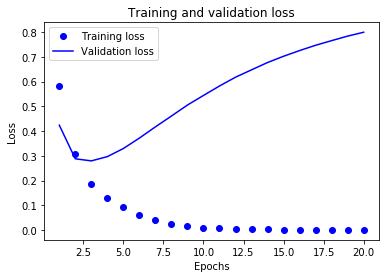

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

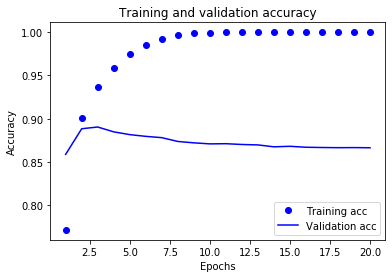

In [32]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();